 # <span style="background-color: Yellow;">GOAL</span> 

### This notebook gives a summary of a study and explains how regression techniques can be used to predict the price of a house.

### The features in the dataset represent different attributes of each house in the dataset.

### It is the objective of this project to apply regression models in order to predict the values for the SalePrice feature.

## <span style="background-color: Yellow;"> ML Methods used:</span>

### **The models that I used in this task:** 

**`Linear Regression`,**

**`Lasso Regression`,**

**`Ridge Regression`,**

**`Support Vector Regressor`,**

**`KNeighbours Regressor`,**

**`Random Forest Regressor`** 

 # <span style="background-color: green;">Imports packages</span> 

In [1]:
# No Data without you guys!
import numpy as np
import pandas as pd

# Visualizations
from IPython.display import display, HTML
import plotly.express as px
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import skew

# Metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error ,r2_score

# Models
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#An effective way to set the display option for all the columns in the dataframe
pd.set_option('display.max_columns', None)

# Ignore in case of warnings
import warnings
warnings.filterwarnings(action="ignore")

# <span style="background-color: green;">Load Data</span>  

In [2]:
# Load train data and make a copy of it
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train = train.copy()

# Load df_test data
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Load sample_submission
sample_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# <span style="background-color: green;">Checking train Dataset</span>

In [3]:
print("**Dataset:**")
print("-------------Train-------------------\n")
display(df_train.head())
print("--------------Train shape ------------------\n")

print("**Dataset shape:**", df_train.shape)
print("--------------Train columns ------------------\n")
display(df_train.columns)

**Dataset:**
-------------Train-------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


--------------Train shape ------------------

**Dataset shape:** (1460, 81)
--------------Train columns ------------------



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print("--------------------Train description----------------------------")
display(df_train.describe().T.head(10))
print("--------------------Train Types----------------------------------")
display(df_train.dtypes.sort_values(ascending=False))
print("--------------------Train NA Check-------------------------------")
display(df_train.isna().sum().sort_values(ascending=False).head(20))

--------------------Train description----------------------------


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


--------------------Train Types----------------------------------


HeatingQC       object
Fence           object
ExterQual       object
FireplaceQu     object
Foundation      object
                 ...  
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
SalePrice        int64
Length: 81, dtype: object

--------------------Train NA Check-------------------------------


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

### <span style="background-color: yellow;">Description of checking Train data result:</span>

* **Data contains 81 columns with 1460 samples.**
* **Data contains Object, int and float type vlues**
* **Data contains null values which the most are in "PoolQC" (Need to be check for the ratio of null values in case of how to handle the null values)**

### <span style="background-color: green;">Checking the ratio of Null values</span>

--------------------Null values ratio-----------------------



Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

--------------------Plotting the ratio of null values-----------------



Text(0.5, 1.0, 'Quantifying missing data')

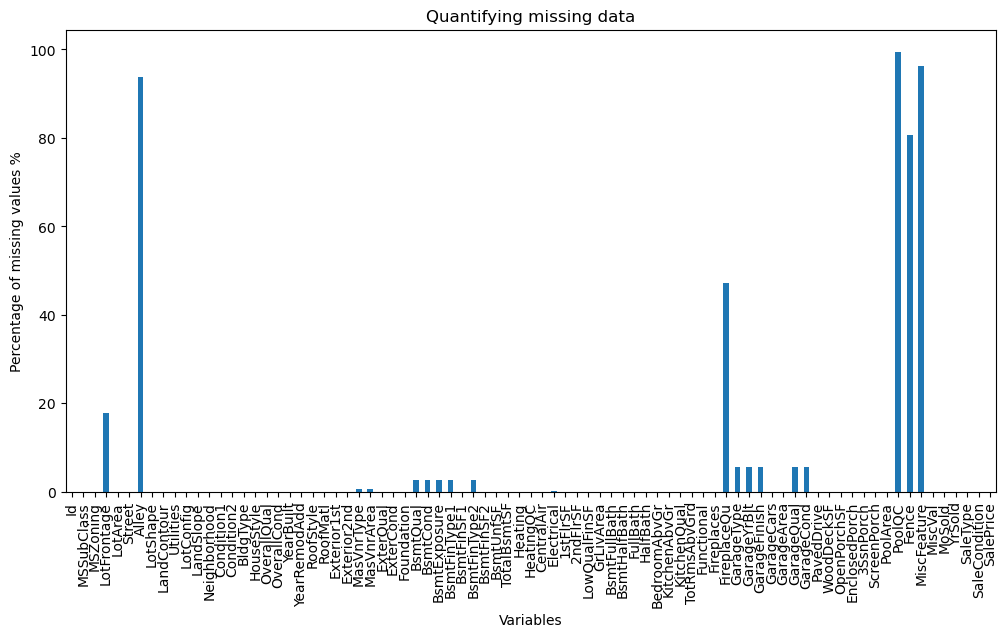

In [5]:
print("--------------------Null values ratio-----------------------\n")
display(df_train.isnull().mean()*100)
print("--------------------Plotting the ratio of null values-----------------\n")
(df_train.isnull().mean()*100).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values %')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [6]:
df_train.columns[df_train.isnull().mean()*100 > 20]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
df_train = df_train.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [8]:
display(df_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
for column in df_train.columns:
    if df_train[column].dtype == np.object:
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)
    elif df_train[column].dtype == np.float64:
        df_train[column].fillna(df_train[column].median(), inplace=True)
    elif df_train[column].dtype == np.int64:
        df_train[column].fillna(df_train[column].median(), inplace=True)
        

In [10]:
print("---------------Checking for the null value again-----------------\n")
display(df_train.isnull().sum())
print("The totall amount of null values:",df_train.isnull().sum().sum())
print("---------------------The final train data set-------------------\n")
display(df_train)

---------------Checking for the null value again-----------------



Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

The totall amount of null values: 0
---------------------The final train data set-------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


### <span style="background-color: yellow;">Description of checking ratio of null values and the handling ways result:</span>


**It's best to aim for as few null values as possible, as they can affect the accuracy and reliability of analysis.
However, there is no hard and fast rule for what ratio of null values is acceptable.**

**As a general guideline, if the percentage of null values in the dataset is less than 5%, we can consider imputing the missing values using methods such as mean or median imputation.**

**If the percentage is greater than 5%, we may want to consider other methods such as dropping rows or columns with null values**

**Since the amount of data is 1460 and based on the ratio of the null values so I decieded to drop 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'.** 

**For the rest of columns that contain null values, I take the median of columns contains int and float types and for the object types, I take mode of the columns.**

# <span style="background-color: green;">Exploratory data analysis (EDA) and Feature Engineering</span> 

### <span style="background-color: yellow;">Checking the Skew and Normal distribution </span>


**Skewness is a measure of the asymmetry of a distribution. If the distribution of a dataset is not symmetric, it is said to be skewed.**

**A dataset can be skewed in either direction, that is, it can have a positive or negative skew. The most common way to measure skewness is to calculate the skewness coefficient.**

**The skewness coefficient is a numerical measure of the degree of skewness in a dataset. It is calculated using the following formula:**

<span style="background-color: pink;">skewness = 3 * (mean - median) / standard deviation</span>


**If the skewness coefficient is zero, the distribution is perfectly symmetrical. If the skewness coefficient is negative, the distribution is skewed to the left (negative skew), and if it is positive, the distribution is skewed to the right (positive skew).**

**In general, a skewness coefficient between -0.5 and 0.5 indicates a relatively symmetrical distribution. A skewness coefficient between -1 and -0.5 or between 0.5 and 1 indicates a moderately skewed distribution, while a skewness coefficient less than -1 or greater than 1 indicates a highly skewed distribution.**



In [11]:
numeric = ['int64','float64']
for column in df_train.columns:
    if df_train[column].dtypes in numeric:
        skew = df_train[column].skew()
        if skew < -1 or skew > 2:
            print(f'The skewness of {column} is : {skew}.\n')
            df_train[column] = np.log1p(df_train[column])
            new_skew = df_train[column].skew()
            print(f'After apply log transform, The skewness of {column} is: {new_skew}.')
            print('-----------------------------------------\n')
        else:
            continue

The skewness of LotFrontage is : 2.4091466665496006.

After apply log transform, The skewness of LotFrontage is: -0.870005697584457.
-----------------------------------------

The skewness of LotArea is : 12.207687851233496.

After apply log transform, The skewness of LotArea is: -0.13740448122837784.
-----------------------------------------

The skewness of MasVnrArea is : 2.6776164510820997.

After apply log transform, The skewness of MasVnrArea is: 0.5035317177020202.
-----------------------------------------

The skewness of BsmtFinSF2 is : 4.255261108933303.

After apply log transform, The skewness of BsmtFinSF2 is: 2.5236937641679753.
-----------------------------------------

The skewness of LowQualFinSF is : 9.011341288465387.

After apply log transform, The skewness of LowQualFinSF is: 7.460316514621369.
-----------------------------------------

The skewness of BsmtHalfBath is : 4.103402697955168.

After apply log transform, The skewness of BsmtHalfBath is: 3.933063524465042

### <span style="background-color: yellow;">Description of checking skewness of columns and the handling ways result:</span>


**There are several methods for handling skewness in a dataset:**

**Square root transformation**

**Box-Cox transformation**

**Winsorization**

**Robust statistics**

**<span style="background-color: pink;">Log transformation:</span> One common method for reducing skewness is to apply a logarithmic transformation to the data. This can help to spread out the values at the high end of the distribution and compress the values at the low end, resulting in a more symmetrical distribution.**

**After applying the log transformation the skewness gets much more better. In general, it's a good idea to explore the distribution of the data visually using histograms or other plots to determine the level of skewness and the most appropriate method for handling it.**

**For plotting the histogram of columns,I used one of the Contributor code plotly which I found it interesting. Thanks OLEKSII ZHUKOV**

In [12]:
def histo_plot(data,column_name_str):
    
    fig = px.histogram(data,x = column_name_str,
                       template='simple_white',
                       color_discrete_sequence = ['red'])

    fig.update_layout(
        xaxis_title= column_name_str,
        yaxis_title="Frequency",
        showlegend = True,
        font = dict(
                size = 14
                ),    
        title={
            'text': "Distribution",
            'y':0.95,
            'x':0.5
            }
        )

    # Display
    fig.show() 

    print("----------------Skewness value-----------------\n")
    print(data[column_name_str].skew())

**df_test the distribution of PoolArea and LotArea in Train data set and the target SalePrice** 

In [13]:
histo_plot(df_train,'SalePrice')
histo_plot(df_train,'PoolArea')
histo_plot(df_train,'LotArea')

----------------Skewness value-----------------

1.8828757597682129


----------------Skewness value-----------------

14.363102459725052


----------------Skewness value-----------------

-0.13740448122837784


**The most values in PoolArea is zero and after log transform still not normally distributed so I drop it.**  

In [14]:
df_train.drop(['PoolArea'], axis=1, inplace=True)

**Till here I handled the numerical value but what about object and category data! Lets check the object values in train data**

In [15]:
object_features = []
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        object_features.append(column_name) 

print(f"----------------Object type features name ----------> number of object features:{len(object_features)} <----------\n ")        
display(object_features)

----------------Object type features name ----------> number of object features:38 <----------
 


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

**it's important to convert object values (i.e. strings or categorical variables) into a numerical format that can be used as input to a machine learning algorithm. There are several methods for doing this:**

**One-hot encoding**

**Binary encoding**

**Hashing encoding**

**<span style="background-color: pink;">Label encoding:</span> This method involves assigning a unique numerical value to each category in a categorical variable.**


## <span style="background-color: green;">Label Encoding</span>

In [16]:
label_encode = LabelEncoder()

In [17]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = label_encode.fit_transform(df_train[column])

In [18]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.189655,9.042040,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,5.283204,2,4,2,2,3,3,2,706,5,0.0,150,856,1,0,1,4,856,854,0.0,1710,1,0.000000,2,1,3,0.693147,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,4.127134,0.000000,0.0,0.0,0.0,2,2008,8,4,208500
1,2,20,3,4.394449,9.169623,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,978,5,0.0,284,1262,1,0,1,4,1262,0,0.0,1262,0,0.693147,2,0,3,0.693147,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0.000000,0.000000,0.0,0.0,0.0,5,2007,8,4,181500
2,3,60,3,4.234107,9.328212,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,5.093750,2,4,2,2,3,2,2,486,5,0.0,434,920,1,0,1,4,920,866,0.0,1786,1,0.000000,2,1,3,0.693147,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,3.761200,0.000000,0.0,0.0,0.0,9,2008,8,4,223500
3,4,70,3,4.110874,9.164401,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,216,5,0.0,540,756,1,2,1,4,961,756,0.0,1717,1,0.000000,1,0,3,0.693147,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,3.583519,5.609472,0.0,0.0,0.0,2,2006,8,0,140000
4,5,60,3,4.442651,9.565284,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,5.860786,2,4,2,2,3,0,2,655,5,0.0,490,1145,1,0,1,4,1145,1053,0.0,2198,1,0.000000,2,1,4,0.693147,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,4.442651,0.000000,0.0,0.0,0.0,12,2008,8,4,250000


## <span style="background-color: yellow;">Let's see the relation between SalePrice our target and some of the features in the dataset:</span>

**it's important to check for linear relationships between the target variable and the other variables in the dataset. This is because many machine learning algorithms, such as linear regression, assume that there is a linear relationship between the target variable and the input variables. If this assumption is violated, the algorithm may not perform well and may produce inaccurate predictions.**


**If there is a linear relationship between the target variable and the input variables, it may be possible to improve the performance of the machine learning algorithm by including additional features that capture non-linear relationships or by transforming the input variables to create a more linear relationship.**

**If there is no linear relationship between the target variable and the input variables, it may be necessary to use a non-linear machine learning algorithm or to engineer new features that better capture the underlying relationship between the variables.**

In [19]:
selected_columns  = ['LotFrontage','LotArea','YearBuilt','MasVnrArea','GrLivArea','GarageCars','GarageArea','OverallQual','TotalBsmtSF']

for column_name in selected_columns:
    fig = px.scatter(
        df_train, x='SalePrice', y= column_name, opacity=0.65,
        trendline='ols', trendline_color_override='darkblue'
    )
    
    fig.show()

### <span style="background-color: yellow;">Let's do some Feature Engineering! I think we need it :)</span> 

* **I remove unnecessary columns Based on what I know ! :)**

In [20]:
df_train.drop(['Id','Street','YearRemodAdd','MiscVal'], axis=1, inplace= True)

* **Change the type of the 'MSSubClass', 'OverallCond', 'YrSold' and 'MoSold' because these are contains numerical values but these numbers are has meaning by their numeric values (Check the data_description.txt)** 

In [21]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

**Lets go to the df_test dataset** 

# <span style="background-color: green;">Same Steps for the df_test Dataset</span> 

In [22]:
print("**Dataset:**")
print("-------------df_test-------------------\n")
display(df_test.head())
print("--------------df_test shape ------------------\n")

print("**Dataset shape:**", df_test.shape)
print("--------------df_test columns ------------------\n")
display(df_test.columns)

**Dataset:**
-------------df_test-------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


--------------df_test shape ------------------

**Dataset shape:** (1459, 80)
--------------df_test columns ------------------



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
print("--------------------df_test description----------------------------")
display(df_test.describe().T.head(10))
print("--------------------df_test Types----------------------------------")
display(df_test.dtypes.sort_values(ascending=False))
print("--------------------df_test NA Check-------------------------------")
display(df_test.isna().sum().sort_values(ascending=False).head(20))

--------------------df_test description----------------------------


,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.0,50.0,70.0,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.0,2001.0,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.0,1992.0,2004.0,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.0,0.0,164.0,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.0,350.5,753.5,4010.0


--------------------df_test Types----------------------------------


HeatingQC       object
KitchenQual     object
ExterCond       object
Foundation      object
BsmtQual        object
                 ...  
GrLivArea        int64
TotRmsAbvGrd     int64
KitchenAbvGr     int64
BedroomAbvGr     int64
Id               int64
Length: 80, dtype: object

--------------------df_test NA Check-------------------------------


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

--------------------Null values ratio-----------------------



Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

--------------------Plotting the ratio of null values-----------------



Text(0.5, 1.0, 'Quantifying missing data')

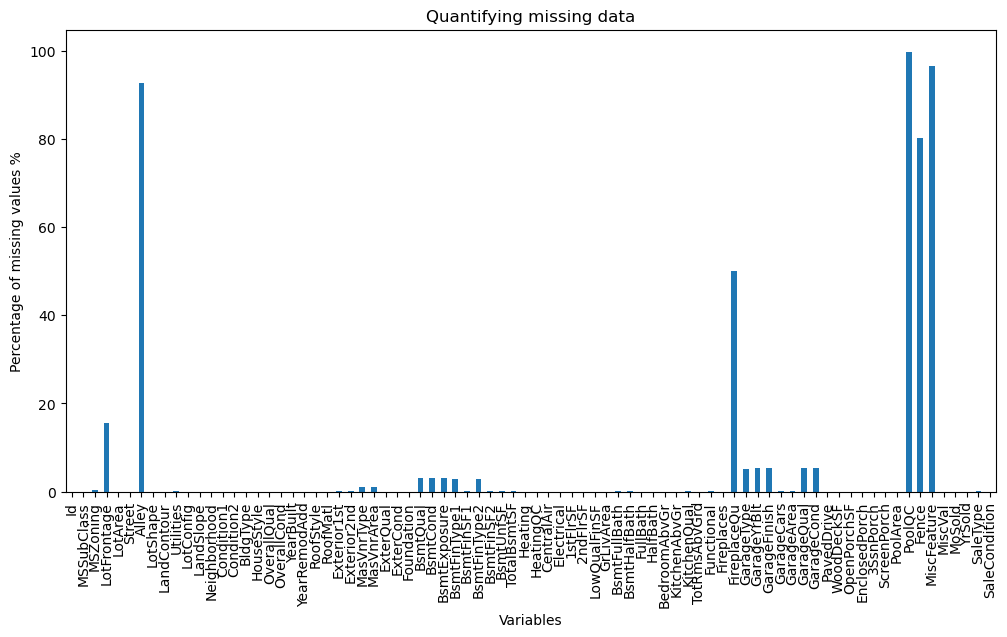

In [24]:
print("--------------------Null values ratio-----------------------\n")
display(df_test.isnull().mean()*100)
print("--------------------Plotting the ratio of null values-----------------\n")
(df_test.isnull().mean()*100).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values %')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [25]:
df_test.columns[df_test.isnull().mean()*100 > 20]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [26]:
df_test = df_test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [27]:
display(df_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [28]:
for column in df_test.columns:
    if df_test[column].dtype == np.object:
        df_test[column].fillna(df_test[column].mode()[0], inplace=True)
    elif df_test[column].dtype == np.float64:
        df_test[column].fillna(df_test[column].median(), inplace=True)
    elif df_test[column].dtype == np.int64:
        df_test[column].fillna(df_test[column].median(), inplace=True)
        

In [29]:
print("---------------Checking for the null value again-----------------\n")
display(df_test.isnull().sum())
print("The totall amount of null values:",df_test.isnull().sum().sum())
print("---------------------The final train data set-------------------\n")
display(df_test)

---------------Checking for the null value again-----------------



Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

The totall amount of null values: 0
---------------------The final train data set-------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [30]:
numeric = ['int64','float64']
for column in df_test.columns:
    if df_test[column].dtypes in numeric:
        skew = df_test[column].skew()
        if skew < -1 or skew > 1:
            print(f'The skewness of {column} is : {skew}.\n')
            df_test[column] = np.log1p(df_test[column])
            new_skew = df_test[column].skew()
            print(f'After apply log transform, The skewness of {column} is: {new_skew}.')
            print('-----------------------------------------\n')
        else:
            continue

The skewness of MSSubClass is : 1.3466896297514908.

After apply log transform, The skewness of MSSubClass is: 0.24174959293533216.
-----------------------------------------

The skewness of LotArea is : 3.115216613500925.

After apply log transform, The skewness of LotArea is: -0.9155979096205403.
-----------------------------------------

The skewness of MasVnrArea is : 2.549568580084032.

After apply log transform, The skewness of MasVnrArea is: 0.5720665767657489.
-----------------------------------------

The skewness of BsmtFinSF1 is : 1.1664262384667747.

After apply log transform, The skewness of BsmtFinSF1 is: -0.6192137607253373.
-----------------------------------------

The skewness of BsmtFinSF2 is : 4.0429539042374705.

After apply log transform, The skewness of BsmtFinSF2 is: 2.4085684003924284.
-----------------------------------------

The skewness of 1stFlrSF is : 1.558194572983426.

After apply log transform, The skewness of 1stFlrSF is: 0.0534988253222509.
---------

In [31]:
def histo_plot(data,column_name_str):
    
    fig = px.histogram(data, x= column_name_str,
                       template='simple_white',
                       color_discrete_sequence = ['red'])

    fig.update_layout(
        xaxis_title= column_name_str,
        yaxis_title="Frequency",
        showlegend = True,
        font = dict(
                size = 14
                ),    
        title={
            'text': "Distribution",
            'y':0.95,
            'x':0.5
            }
        )

    # Display
    fig.show() 

    print("----------------Skewness value-----------------\n")
    print(data[column_name_str].skew())

In [32]:
histo_plot(df_test,'PoolArea')
histo_plot(df_test,'LotArea')

----------------Skewness value-----------------

15.720913674047146


----------------Skewness value-----------------

-0.9155979096205403


In [33]:
df_test.drop(['PoolArea'], axis=1, inplace=True)

In [34]:
object_features = []
for column_name in df_test.columns:
    if df_test[column_name].dtype == 'object':
        object_features.append(column_name) 

print(f"----------------Object type features name ----------> number of object features:{len(object_features)} <----------\n ")        
display(object_features)

----------------Object type features name ----------> number of object features:38 <----------
 


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
label_encode = LabelEncoder()

In [36]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        df_test[column] = label_encode.fit_transform(df_test[column])

In [37]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3.044522,2,80.0,9.360741,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.000000,3,4,1,3,3,3,4,6.150603,3,4.976734,270.0,882.0,0,4,1,3,6.799056,0,0.0,6.799056,0.0,0.0,1,0,2,0.693147,3,5,6,0,1,1961.0,2,1.0,730.0,3,4,2,4.948760,0.000000,0.0,0.0,4.795791,0.000000,6,2010,8,4
1,1462,3.044522,3,81.0,9.565775,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,4.691348,3,4,1,3,3,3,0,6.828712,5,0.000000,406.0,1329.0,0,4,1,3,7.192934,0,0.0,7.192934,0.0,0.0,1,1,3,0.693147,2,6,6,0,1,1958.0,2,1.0,312.0,3,4,2,5.976351,3.610918,0.0,0.0,0.000000,9.433564,6,2010,8,4
2,1463,4.110874,3,74.0,9.534668,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.000000,3,4,2,2,3,3,2,6.674561,5,0.000000,137.0,928.0,0,2,1,3,6.834109,701,0.0,7.396335,0.0,0.0,2,1,3,0.693147,3,6,6,1,1,1997.0,0,2.0,482.0,3,4,2,5.361292,3.555348,0.0,0.0,0.000000,0.000000,3,2010,8,4
3,1464,4.110874,3,78.0,9.208238,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,3.044522,3,4,2,3,3,3,2,6.401917,5,0.000000,324.0,926.0,0,0,1,3,6.831954,678,0.0,7.380879,0.0,0.0,2,1,3,0.693147,2,7,6,1,1,1998.0,0,2.0,470.0,3,4,2,5.888878,3.610918,0.0,0.0,0.000000,0.000000,6,2010,8,4
4,1465,4.795791,3,43.0,8.518392,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.000000,2,4,2,2,3,3,0,5.575949,5,0.000000,1017.0,1280.0,0,0,1,3,7.155396,0,0.0,7.155396,0.0,0.0,2,0,2,0.693147,2,5,6,0,1,1992.0,1,2.0,506.0,3,4,2,0.000000,4.418841,0.0,0.0,4.976734,0.000000,1,2010,8,4


In [38]:
df_test.drop(['Street','YearRemodAdd','MiscVal'], axis=1, inplace= True)

In [39]:
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

# <span style="background-color: green;">Regression Models</span>

### **The models that I used in this task `Linear Regression`,`Lasso Regression`,`Ridge Regression`,`Support Vector Regressor`,`KNeighbours Regressor` and `Random Forest Regressor`** 

**Let's make our evaluation metrics function that we want to know from our model** 

In [40]:
def evaluation(y_actual,y_predicted):
    mse = mean_squared_error(y_actual,y_predicted)
    rmse = np.sqrt(mse)
    accuracy = r2_score(y_actual,y_predicted)
    return mse,rmse,accuracy

**Define X and Y and X_test from test dataset (I removed the Id before :))** 

In [41]:
X = df_train.drop(columns=['SalePrice'])
Y = df_train['SalePrice']
X_df_test = df_test

**Split data into train and test with the test size of 30%**  

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

## Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)
mse_lr,rmse_lr,accuracy_lr= evaluation(Y_test,y_pred_lr)

## Lasso Regression


In [44]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso,rmse_lasso,accuracy_lasso = evaluation(Y_test,y_pred_lasso)

## Ridge Regression

In [45]:
ridge = Ridge()
ridge.fit(X_train,Y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge,rmse_ridge,accuracy_ridge = evaluation(Y_test,y_pred_ridge)

## Support Vector Regressor


In [46]:
svr = SVR()
svr.fit(X_train,Y_train)
y_pred_svr = svr.predict(X_test)
mse_svr,rmse_svr,accuracy_svr = evaluation(Y_test,y_pred_svr)

## KNeighbours Regressor

In [47]:
knr = KNeighborsRegressor()
knr.fit(X_train,Y_train)
y_pred_knr = knr.predict(X_test)
mse_knr,rmse_knr,accuracy_knr = evaluation(Y_test,y_pred_knr)

## Random Forest Regressor

In [48]:
rfr = RandomForestRegressor(n_estimators=7000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr,rmse_rfr,accuracy_rfr = evaluation(Y_test,y_pred_rfr)

In [49]:
models = ['Linear Regression','Lasso Regression','Ridge Regression','Support Vector Regressor','KNeighbours Regressor','Random Forest Regressor']

rmse_scores = [rmse_lr, rmse_lasso, rmse_ridge, rmse_svr,rmse_knr,rmse_rfr]
mse_scores = [mse_lr, mse_lasso, mse_ridge, mse_svr,mse_knr,mse_rfr]
accuracy_scores = [accuracy_lr, accuracy_lasso, accuracy_ridge, accuracy_svr,accuracy_knr,accuracy_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores,
    'MSE_Scores' : mse_scores,
    'Accuracy_Scores' : accuracy_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

,Regression Models,RMSE Scores,MSE_Scores,Accuracy_Scores
0,Random Forest Regressor,28293.206264,8.005055e+08,0.885283
1,Ridge Regression,33619.768995,1.130289e+09,0.838023
2,Lasso Regression,33625.832623,1.130697e+09,0.837965
3,Linear Regression,33668.598685,1.133575e+09,0.837552
4,KNeighbours Regressor,38436.355714,1.477353e+09,0.788287
5,Support Vector Regressor,84847.091218,7.199029e+09,-0.031661


# Submission

In [50]:
prediction = rfr.predict(df_test.drop(columns=['Id'],axis=1))

In [51]:
ids = df_test['Id']

In [52]:
Final_sub = pd.DataFrame({"Id":ids,"SalePrice":prediction})

In [53]:
Final_sub.to_csv('final_submission.csv', index = False)

In [54]:
Final_sub

,Id,SalePrice
0,1461,119647.274232
1,1462,135816.089002
2,1463,138339.730268
3,1464,144753.445013
4,1465,205064.744945
...,...,...
1454,2915,84676.381910
1455,2916,87448.040097
1456,2917,138193.735176
1457,2918,112182.987218


## Conclusion

**Based on my regression models the Random Forest Regression performed better result than the other regression model.** 